<a href="https://colab.research.google.com/github/gusujio/neural_networks_start/blob/master/%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import torch


In [ ]:
x = torch.tensor(
    [[1.,  2.,  3.,  4.],
     [5.,  6.,  7.,  8.],
     [9., 10., 11., 12.]], requires_grad=True) # requires_grad значит, что это переменная по которой можно посчитать производную, а не какая-то константа 

########
# device = torch.device('cuda:0' # перходит с  cpu на gpu
#                       if torch.cuda.is_available() 
#                       else 'cpu')
# x = x.to(device)
########

function = 10 * (x ** 2).sum()

function.backward() # считает производную

print(x.grad, '<- gradient') # x.grad печатаем результат, а т.е градиент 
# тут надо понимать, что берём мы производную от функции, а результат этой
# производной, результат операции "backward" у нас появляется в атрибуте ".grad" тензора.

x.data -= 0.001 * x.grad
x.grad.zero_()
#  Метод "zero_" с нижним подчеркиваем нам обнулит весь градиент.
#  в PyTorch очень часто используются функции с нижним подчеркиваем на конце, они значат "inplace" операция

tensor([[ 20.,  40.,  60.,  80.],
        [100., 120., 140., 160.],
        [180., 200., 220., 240.]]) <- gradient


In [ ]:
import torch

x = torch.tensor(
    [8., 8.], requires_grad=True)
var_history = []
fn_history = []

def function_parabola(variable):
    return 10 * (variable ** 2).sum()

def make_gradient_step(function, variable):
    function_result = function(variable)
    function_result.backward()
    variable.data -= 0.001 * variable.grad
    variable.grad.zero_()

for i in range(500):
    var_history.append(x.data.cpu().numpy().copy())
    fn_history.append(function_parabola(x).data.cpu().numpy().copy())
    make_gradient_step(function_parabola, x)

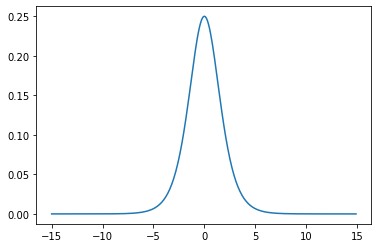

0.25


In [ ]:
from math import exp
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-15,15,0.1)


def func(x):
    return (1/(1+exp(-x))) * (1 - (1/(1+exp(-x))))


y = [func(i) for i in x]
plt.plot(x, y)
plt.show()
print(max(y))

In [ ]:
from math import exp
def sigma(x):
  return(1 / (1 + exp(-x)))
def func(x):
  print(sigma(x) * (1 - sigma(x)))

In [ ]:
func(0)

0.25
